In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('kiva_loan.csv')
df.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.0,16,monthly


In [4]:
df = df.dropna(subset = ['use', 'funded_time', 'partner_id'])

In [5]:
df = df.drop(columns = 'region')

In [6]:
df['funded_time'] = pd.to_datetime(df['funded_time'])
df['posted_time'] = pd.to_datetime(df['posted_time'])

In [7]:
df['id'] = df['id'].astype('object')
df['activity'] = df['activity'].astype('category')
df['sector'] = df['sector'].astype('category')
df['country'] = df['country'].astype('category')
df['currency'] = df['currency'].astype('category')
df['repayment_interval'] = df['repayment_interval'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608203 entries, 0 to 671201
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  608203 non-null  object             
 1   funded_amount       608203 non-null  float64            
 2   loan_amount         608203 non-null  float64            
 3   activity            608203 non-null  category           
 4   sector              608203 non-null  category           
 5   use                 608203 non-null  object             
 6   country             608203 non-null  category           
 7   currency            608203 non-null  category           
 8   partner_id          608203 non-null  float64            
 9   posted_time         608203 non-null  datetime64[ns, UTC]
 10  funded_time         608203 non-null  datetime64[ns, UTC]
 11  term_in_months      608203 non-null  float64            
 12  lender_count        6

In [69]:
df['country'].unique()

['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador', ..., 'Madagascar', 'Namibia', 'Lesotho', 'Cote D'Ivoire', 'Bhutan']
Length: 84
Categories (84, object): ['Afghanistan', 'Albania', 'Armenia', 'Azerbaijan', ..., 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

---

> Perbandingan antara jumlah `lender_count` dengan `repayment_interval`

---

In [29]:
df_lcri = df.groupby(by = 'repayment_interval')[['lender_count']].count().reset_index().sort_values(by = 'lender_count', ascending = False).head(5)
df_lcri

,repayment_interval,lender_count
2,monthly,303421
1,irregular,245326
0,bullet,59456


In [31]:
df_lcri['repayment_interval'] = df_lcri['repayment_interval'].cat.remove_unused_categories()
df_lcri

,repayment_interval,lender_count
2,monthly,303421
1,irregular,245326
0,bullet,59456


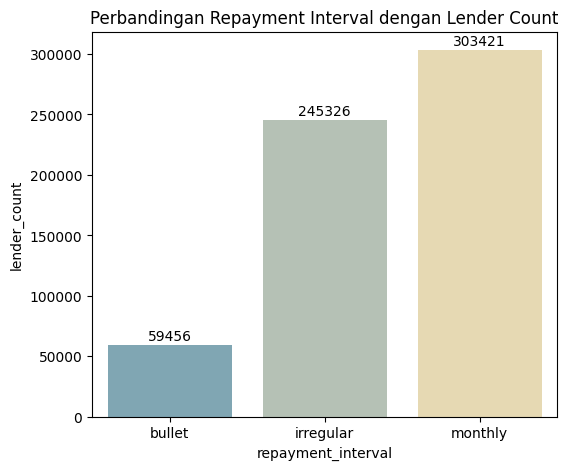

In [34]:
plt.figure(figsize = (6,5))
fig = sns.barplot(df_lcri, x = 'repayment_interval', y = 'lender_count', palette = "blend:#7AB,#EDA")
plt.title('Perbandingan Repayment Interval dengan Lender Count')

for container in fig.containers:
    fig.bar_label(container, padding = 1, fmt = '%.0f')
    
plt.show()

**Insight:**

- `repayment interval` monthly memiliki `lender count` paling banyak dengan 303.421 orang

---

> Perbandingan antara jumlah `activity` dengan `loan_amount`

---

In [14]:
df_act = df.groupby(by = 'activity')[['loan_amount']].sum().reset_index().sort_values(by = 'loan_amount', ascending = False).head(5)
df_act

,activity,loan_amount
57,Farming,44693125.0
72,General Store,31751050.0
133,Retail,21819125.0
1,Agriculture,20946300.0
34,Clothing Sales,20751550.0


In [30]:
df_act['activity'] = df_act['activity'].cat.remove_unused_categories()
df_act

,activity,loan_amount
57,Farming,44693125.0
72,General Store,31751050.0
133,Retail,21819125.0
1,Agriculture,20946300.0
34,Clothing Sales,20751550.0


In [15]:
df_act['activity'] = df_act['activity'].cat.remove_unused_categories()
df_act

,activity,loan_amount
57,Farming,44693125.0
72,General Store,31751050.0
133,Retail,21819125.0
1,Agriculture,20946300.0
34,Clothing Sales,20751550.0


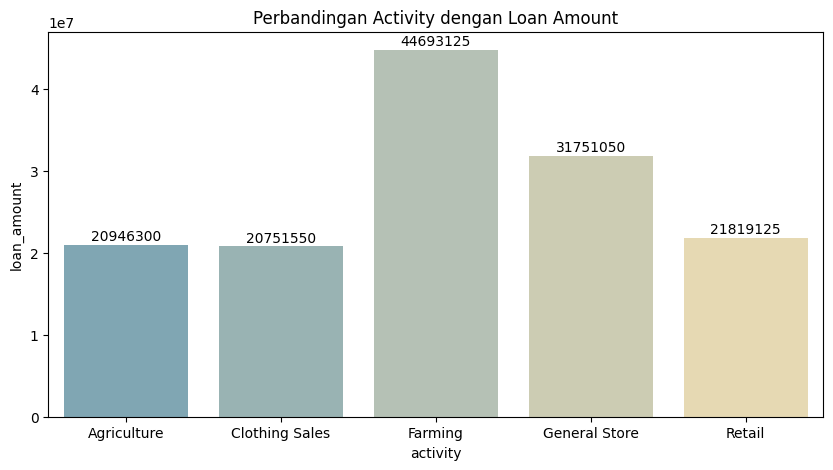

In [26]:
plt.figure(figsize = (10,5))
fig = sns.barplot(df_act, x = 'activity', y = 'loan_amount', palette = "blend:#7AB,#EDA")
plt.title('Perbandingan Activity dengan Loan Amount')

for container in fig.containers:
    fig.bar_label(container, padding = 1, fmt = '%.0f')
    
plt.show()

**Insight:**

- `Activity` dengan `Loan Amount` terbanyak adalah `Farming Activity` dengan `Loan Amount` sebesar 44.693.125

---

> Perbandingan antara jumlah `sector` dengan `loan_amount`

---

In [17]:
df_sec = df.groupby(by = 'sector')[['loan_amount']].sum().reset_index().sort_values(by = 'loan_amount', ascending = False).head(5)
df_sec

,sector,loan_amount
0,Agriculture,122025500.0
6,Food,103357600.0
11,Retail,81405675.0
12,Services,35416150.0
2,Clothing,31014825.0


In [18]:
df_sec['sector'] = df_sec['sector'].cat.remove_unused_categories()
df_sec

,sector,loan_amount
0,Agriculture,122025500.0
6,Food,103357600.0
11,Retail,81405675.0
12,Services,35416150.0
2,Clothing,31014825.0


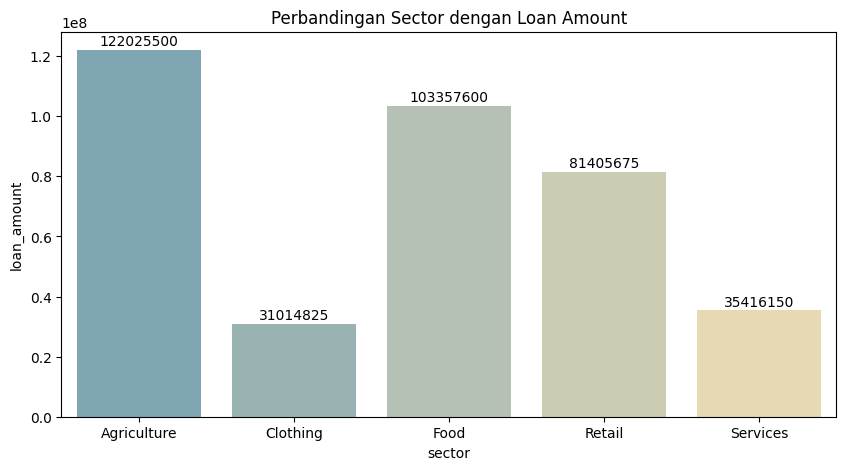

In [37]:
plt.figure(figsize = (10,5))
fig = sns.barplot(df_sec, x = 'sector', y = 'loan_amount', palette = "blend:#7AB,#EDA")
plt.title('Perbandingan Sector dengan Loan Amount')

for container in fig.containers:
    fig.bar_label(container, padding = 1, fmt = '%.0f')
    
plt.show()

**Insight:**

- `Sector` dengan `Loan Amount` terbanyak adalah Agriculture dengan `Loan Amount` sebesar 122.025.500

---

> Top 5 `partner_id` yang paling di percaya

---

In [20]:
df['partner_id'].nunique()

361

In [21]:
df_partner = df.groupby(by = 'partner_id')[['id']].count().reset_index().sort_values(by = 'id', ascending = False).head(5)
df_partner

,partner_id,id
63,145.0,105997
96,199.0,16208
174,311.0,15769
49,125.0,14387
69,156.0,14237


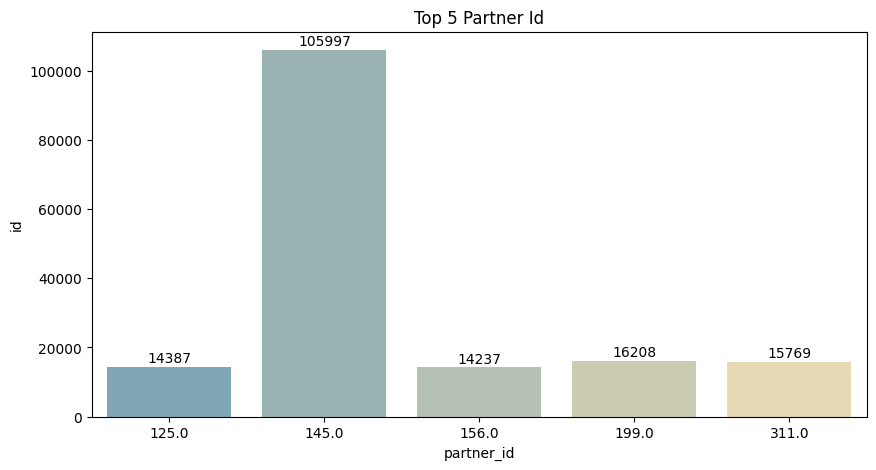

In [38]:
plt.figure(figsize = (10,5))
fig = sns.barplot(df_partner, x = 'partner_id', y = 'id', palette = "blend:#7AB,#EDA")
plt.title('Top 5 Partner Id')

for container in fig.containers:
    fig.bar_label(container, padding = 1, fmt = '%.0f')
    
plt.show()

**Insight:**

- `Partner Id` yang paling di percaya adalah id 145 dengan dipercayai oleh 105.997 orang

---

> Top 5 `country` dengan user terbanyak

---

In [23]:
df_neg = df.groupby(by = 'country')[['id']].count().reset_index().sort_values(by = 'id', ascending = False).head(5)
df_neg

,country,id
58,Philippines,157533
33,Kenya,61859
11,Cambodia,33437
22,El Salvador,32260
53,Pakistan,24918


In [24]:
df_neg['country'] = df_neg['country'].cat.remove_unused_categories()
df_neg

,country,id
58,Philippines,157533
33,Kenya,61859
11,Cambodia,33437
22,El Salvador,32260
53,Pakistan,24918


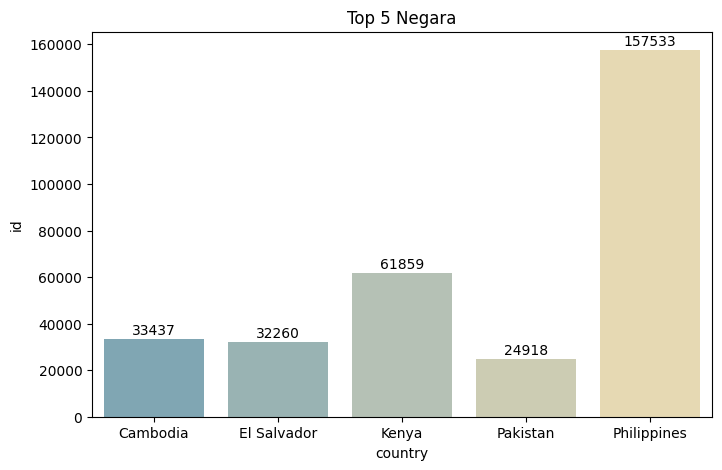

In [54]:
plt.figure(figsize = (8,5))
fig = sns.barplot(df_neg, x = 'country', y = 'id', palette = "blend:#7AB,#EDA")
plt.title('Top 5 Negara')

for container in fig.containers:
    fig.bar_label(container, padding = 1, fmt = '%.0f')
    
plt.show()

**Insight:**

- Negara Philippines merupakan negara dengan user terbanyak yaitu sebanyak 157.533 user

---

> Philippines

---

In [42]:
df_ph = df[df['country'] == 'Philippines']

In [51]:
df_phsector = df_ph.groupby(by = 'sector')[['id']].count().reset_index().sort_values(by = 'id', ascending = False).head(5)
df_phsector

,sector,id
11,Retail,52183
6,Food,42005
0,Agriculture,36428
8,Housing,6579
13,Transportation,4474


In [53]:
df_phsector['sector'] = df_phsector['sector'].cat.remove_unused_categories()
df_phsector

,sector,id
11,Retail,52183
6,Food,42005
0,Agriculture,36428
8,Housing,6579
13,Transportation,4474


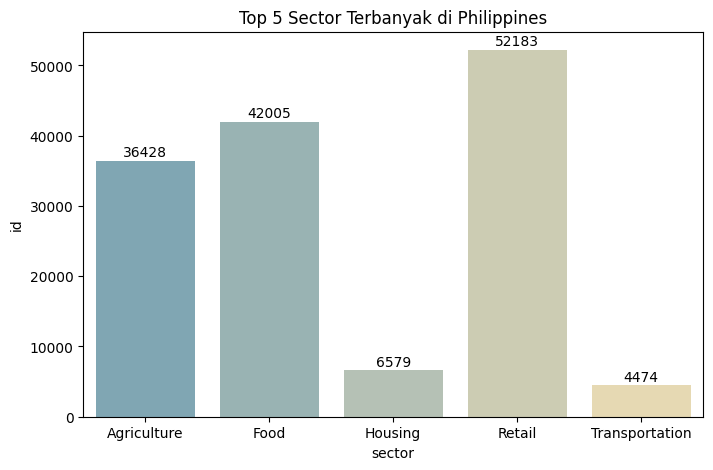

In [57]:
plt.figure(figsize = (8,5))
fig = sns.barplot(df_phsector, x = 'sector', y = 'id', palette = "blend:#7AB,#EDA")
plt.title('Top 5 Sector Terbanyak di Philippines')

for container in fig.containers:
    fig.bar_label(container, padding = 1, fmt = '%.0f')
    
plt.show()

**Insight:**

- `Sector` yang paling banyak di Philippines adalah `Sector` Retail dengan 52.183

---

> Kenya

---

In [46]:
df_kny = df[df['country'] == 'Kenya']

In [58]:
df_knysector = df_kny.groupby(by = 'sector')[['id']].count().reset_index().sort_values(by = 'id', ascending = False).head(5)
df_knysector

,sector,id
0,Agriculture,29276
6,Food,11804
11,Retail,7412
12,Services,3557
2,Clothing,3099


In [59]:
df_knysector['sector'] = df_knysector['sector'].cat.remove_unused_categories()
df_knysector

,sector,id
0,Agriculture,29276
6,Food,11804
11,Retail,7412
12,Services,3557
2,Clothing,3099


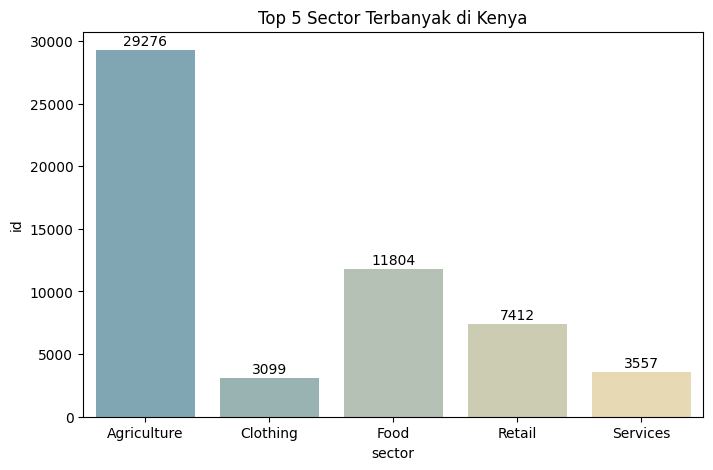

In [60]:
plt.figure(figsize = (8,5))
fig = sns.barplot(df_knysector, x = 'sector', y = 'id', palette = "blend:#7AB,#EDA")
plt.title('Top 5 Sector Terbanyak di Kenya')

for container in fig.containers:
    fig.bar_label(container, padding = 1, fmt = '%.0f')
    
plt.show()

**Insight:**

- `Sector` yang paling banyak di Kenya adalah `Sector` Agriculture dengan 29.276

---

> Cambodia

---

In [45]:
df_cmb = df[df['country'] == 'Cambodia']

In [61]:
df_cmbsector = df_cmb.groupby(by = 'sector')[['id']].count().reset_index().sort_values(by = 'id', ascending = False).head(5)
df_cmbsector

,sector,id
10,Personal Use,18066
0,Agriculture,9653
8,Housing,2016
4,Education,1365
6,Food,1065


In [62]:
df_cmbsector['sector'] = df_cmbsector['sector'].cat.remove_unused_categories()
df_cmbsector

,sector,id
10,Personal Use,18066
0,Agriculture,9653
8,Housing,2016
4,Education,1365
6,Food,1065


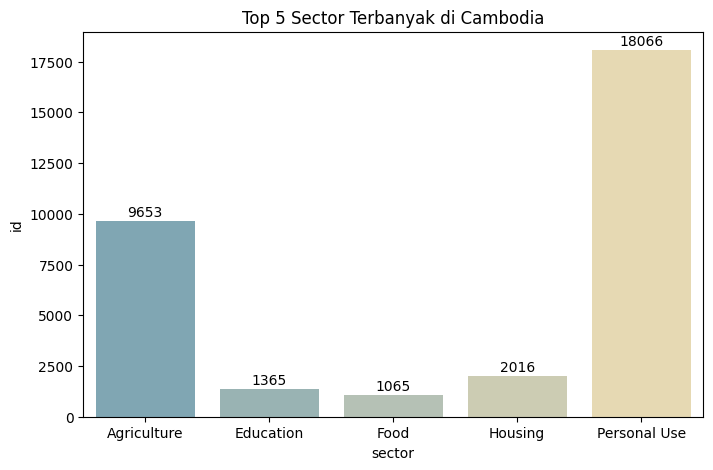

In [63]:
plt.figure(figsize = (8,5))
fig = sns.barplot(df_cmbsector, x = 'sector', y = 'id', palette = "blend:#7AB,#EDA")
plt.title('Top 5 Sector Terbanyak di Cambodia')

for container in fig.containers:
    fig.bar_label(container, padding = 1, fmt = '%.0f')
    
plt.show()

**Insight:**

- `Sector` yang paling banyak di Cambodia adalah `Sector` Personal Use dengan 18.066

---

> El Savador

---

In [70]:
df_es = df[df['country'] == 'El Salvador']
df_es

,id,funded_amount,loan_amount,activity,sector,use,country,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
49,653418,450.0,450.0,General Store,Retail,to stock his store.,El Salvador,USD,81.0,2014-01-02 22:17:55+00:00,2014-01-30 00:19:42+00:00,14.0,18,monthly
202,653360,500.0,500.0,General Store,Retail,"to buy beans, oil, sugar, coffee, sweets, soft...",El Salvador,USD,81.0,2014-01-02 14:31:22+00:00,2014-01-22 16:12:15+00:00,14.0,12,monthly
211,653413,550.0,550.0,Food Production/Sales,Food,"to buy corn, firewood, and propane gas, and to...",El Salvador,USD,167.0,2014-01-02 21:44:14+00:00,2014-01-22 15:17:02+00:00,14.0,20,monthly
215,653374,500.0,500.0,Personal Housing Expenses,Housing,"to buy cement, iron, and hurricane fencing",El Salvador,USD,81.0,2014-01-02 15:26:40+00:00,2014-01-14 16:10:48+00:00,14.0,19,monthly
255,653425,300.0,300.0,Fruits & Vegetables,Food,to buy fruit and vegetables wholesale like ora...,El Salvador,USD,81.0,2014-01-02 22:35:07+00:00,2014-01-03 05:26:13+00:00,11.0,12,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670987,1338353,175.0,175.0,Cattle,Agriculture,to buy a calf to fatten and sell.,El Salvador,USD,199.0,2017-07-12 14:30:27+00:00,2017-07-15 16:40:05+00:00,14.0,4,irregular
670998,1338466,100.0,100.0,Cattle,Agriculture,to buy a beef steer to care for in the winter ...,El Salvador,USD,199.0,2017-07-12 16:15:25+00:00,2017-07-26 01:04:10+00:00,12.0,4,bullet
671006,1338429,400.0,400.0,Fruits & Vegetables,Food,"to buy more vegetables to sell, in order to ha...",El Salvador,USD,199.0,2017-07-12 15:48:37+00:00,2017-07-14 15:47:04+00:00,14.0,9,monthly
671084,1338347,300.0,300.0,Natural Medicines,Health,to buy more nutritional supplements to keep se...,El Salvador,USD,199.0,2017-07-12 14:25:23+00:00,2017-07-15 14:21:03+00:00,9.0,7,irregular


In [71]:
df_essector = df_es.groupby(by = 'sector')[['id']].count().reset_index().sort_values(by = 'id', ascending = False).head(5)
df_essector

,sector,id
0,Agriculture,11598
6,Food,6948
8,Housing,4599
11,Retail,4188
2,Clothing,1466


In [72]:
df_essector['sector'] = df_essector['sector'].cat.remove_unused_categories()
df_essector

,sector,id
0,Agriculture,11598
6,Food,6948
8,Housing,4599
11,Retail,4188
2,Clothing,1466


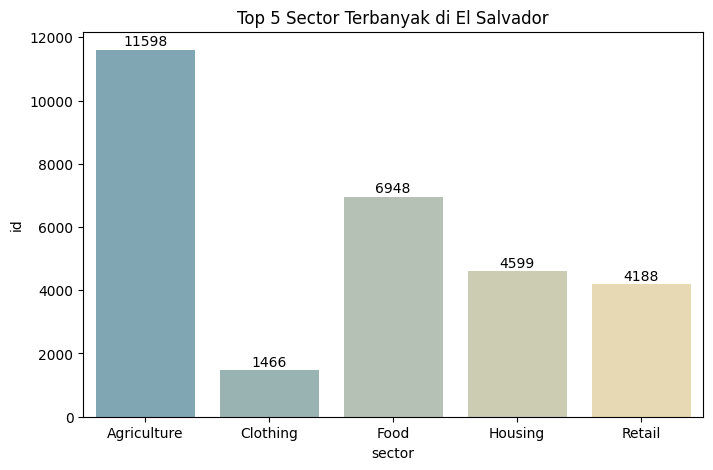

In [73]:
plt.figure(figsize = (8,5))
fig = sns.barplot(df_essector, x = 'sector', y = 'id', palette = "blend:#7AB,#EDA")
plt.title('Top 5 Sector Terbanyak di El Salvador')

for container in fig.containers:
    fig.bar_label(container, padding = 1, fmt = '%.0f')
    
plt.show()

**Insight:**

- `Sector` yang paling banyak di El Savador adalah `Sector` Agriculture dengan 11.598

---

> Pakistan

---

In [75]:

df_p = df[df['country'] == 'Pakistan']
df_p

,id,funded_amount,loan_amount,activity,sector,use,country,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,PKR,247.0,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,PKR,247.0,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.0,14,irregular
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,PKR,247.0,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,Pakistan,PKR,245.0,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.0,16,monthly
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,Pakistan,PKR,245.0,2014-01-01 11:46:01+00:00,2014-01-10 18:18:44+00:00,14.0,8,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669001,1333899,350.0,350.0,Manufacturing,Manufacturing,to increase her thread manufacturing business ...,Pakistan,PKR,247.0,2017-07-05 10:52:28+00:00,2017-07-13 20:35:37+00:00,15.0,8,monthly
670350,1335851,250.0,250.0,Crafts,Arts,"to buy supplies like iron wire, strings, gum, ...",Pakistan,PKR,247.0,2017-07-07 11:39:45+00:00,2017-07-16 00:37:58+00:00,15.0,5,monthly
671152,1340239,25.0,25.0,Livestock,Agriculture,Reviewed loan use in english.,Pakistan,PKR,245.0,2017-07-20 22:03:15+00:00,2017-07-22 00:53:41+00:00,13.0,1,monthly
671164,1340256,25.0,25.0,Livestock,Agriculture,Reviewed loan use in english.,Pakistan,PKR,245.0,2017-07-21 15:16:37+00:00,2017-07-22 01:23:18+00:00,13.0,1,monthly


In [76]:
df_p = df_ph.groupby(by = 'sector')[['id']].count().reset_index().sort_values(by = 'id', ascending = False).head(5)
df_p

,sector,id
11,Retail,52183
6,Food,42005
0,Agriculture,36428
8,Housing,6579
13,Transportation,4474


In [77]:
df_p['sector'] = df_p['sector'].cat.remove_unused_categories()
df_p

,sector,id
11,Retail,52183
6,Food,42005
0,Agriculture,36428
8,Housing,6579
13,Transportation,4474


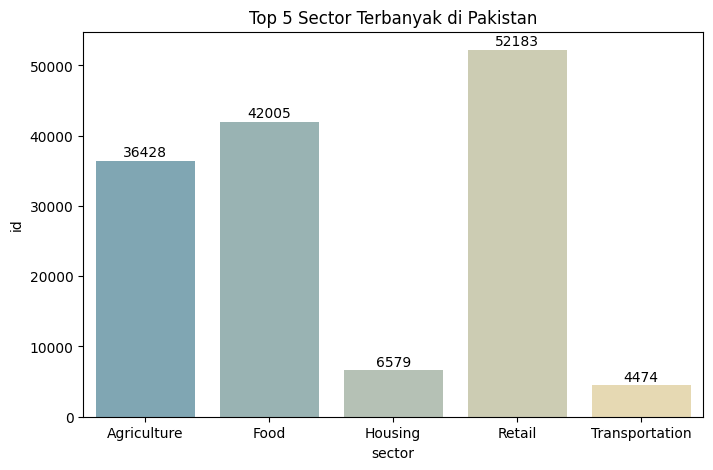

In [78]:
plt.figure(figsize = (8,5))
fig = sns.barplot(df_p, x = 'sector', y = 'id', palette = "blend:#7AB,#EDA")
plt.title('Top 5 Sector Terbanyak di Pakistan')

for container in fig.containers:
    fig.bar_label(container, padding = 1, fmt = '%.0f')
    
plt.show()

**Insight:**

- `Sector` yang paling banyak di Pakistan adalah `Sector` Retail dengan 52.183

---

> Insight Perusahaan:

---

- Jika perusahaan ingin meminjamkan dana untuk seluruh `Activity`, Pilihlah `Activity` dengan `Repayment Interval` Monthly
- Jika perusahaan ingin meminjamkan dana untuk `Activity` paling banyak dipilih, Pilihlah `Activity` Farming Activity
- Jika perusahaan ingin meminjamkan dana untuk `Sector` paling banyak dipilih, Pilihlah `Sector` Agriculture
- Jika perusahaan ingin meminjamkan dana ke `Partner Id` yang paling dipercaya, Pilihlah `Partner Id` 145
- Jika perusahaan ingin meminjamkan dana ke negara dengan user terbanyak, Pilihlah negara Philippines
- Jika perusahaan ingin meminjamkan dana ke negara Philippines, Pilihlah `Sector` Retail
- Jika perusahaan ingin meminjamkan dana ke negara Kenya, Pilihlah `Sector` Agriculture
- Jika perusahaan ingin meminjamkan dana ke negara Cambodia, Pilihlah `Sector` Personal Use
- Jika perusahaan ingin meminjamkan dana ke negara El Salvador, Pilihlah `Sector` Agriculture
- Jika perusahaan ingin meminjamkan dana ke negara Pakistan, Pilihlah `Sector` Retail